In [33]:
%autosave 0

Autosave disabled


In [34]:
import pandas as pd
from pydataset import data
#if halfway through your work, you need another library, you can import block and add import here. not at random places

Boolean masking -  
We can use an array of boolean values to return a subset of our series.  
We only get back values where the boolean array is True.  
We can evaluate multiple statements at once.

In [35]:
my_series = pd.Series(range(1, 21, 1))

In [36]:
my_series[my_series > 10]

10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
dtype: int64

The curriculum has a method for determining which values belong in the fourth quartile.  

We could also do it with [pd.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html#pandas.qcut).  

We will pass two arguments: the pandas series, and the number of bins we want (4 for quartiles).

In [37]:
my_series[my_series % 2 == 0]

1      2
3      4
5      6
7      8
9     10
11    12
13    14
15    16
17    18
19    20
dtype: int64

In [38]:
my_series[(my_series > 10) | (my_series % 2 == 1)]

# | this is the logical 'or' vs the & sign

0      1
2      3
4      5
6      7
8      9
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
dtype: int64

String vectorization.

We can perform string operations across all values in a series using the .str attribute.

In [39]:
pd.qcut(my_series, 4, labels = ['q1', 'q2', 'q3', 'q4'])



0     q1
1     q1
2     q1
3     q1
4     q1
5     q2
6     q2
7     q2
8     q2
9     q2
10    q3
11    q3
12    q3
13    q3
14    q3
15    q4
16    q4
17    q4
18    q4
19    q4
dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

In [40]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [41]:
mpg_t = mpg.trans

In [42]:
#string vectorization, going to take the series and manipulative
mpg_t.str.upper()

1        AUTO(L5)
2      MANUAL(M5)
3      MANUAL(M6)
4        AUTO(AV)
5        AUTO(L5)
          ...    
230      AUTO(S6)
231    MANUAL(M6)
232      AUTO(L5)
233    MANUAL(M5)
234      AUTO(S6)
Name: trans, Length: 234, dtype: object

In [43]:
mpg_t.str.replace('(', '_').str.replace(')', '_').str.upper()

/var/folders/mn/mp1xhgm522gc5vhffb_k61d00000gn/T/ipykernel_62237/1221487044.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mpg_t.str.replace('(', '_').str.replace(')', '_').str.upper()


1        AUTO_L5_
2      MANUAL_M5_
3      MANUAL_M6_
4        AUTO_AV_
5        AUTO_L5_
          ...    
230      AUTO_S6_
231    MANUAL_M6_
232      AUTO_L5_
233    MANUAL_M5_
234      AUTO_S6_
Name: trans, Length: 234, dtype: object

In [44]:
"""There are other methods available for use! Some common ones include..

.any() and .all()
.isin()
.apply()"""

'There are other methods available for use! Some common ones include..\n\n.any() and .all()\n.isin()\n.apply()'

In [45]:
(mpg_t == 'auto(l5)').any()  # trying to see if there any entry that equal to that string

True

In [46]:
(mpg_t == 'auto(l5)').all()  # this will show all equal to that value

False

In [47]:
mpg_t.isin(['auto(l5)'])

1       True
2      False
3      False
4      False
5       True
       ...  
230    False
231    False
232     True
233    False
234    False
Name: trans, Length: 234, dtype: bool

In [48]:
def mathinator(n):
    
    return n * 2 + 4 / 3

In [49]:
my_series.apply(mathinator)

0      3.333333
1      5.333333
2      7.333333
3      9.333333
4     11.333333
5     13.333333
6     15.333333
7     17.333333
8     19.333333
9     21.333333
10    23.333333
11    25.333333
12    27.333333
13    29.333333
14    31.333333
15    33.333333
16    35.333333
17    37.333333
18    39.333333
19    41.333333
dtype: float64

In [50]:
"""We can bin values using pd.cut.

We can specify the number of bins to create, to make n bins of equal size.

We can also create the cutoffs for the bins ourselves."""

'We can bin values using pd.cut.\n\nWe can specify the number of bins to create, to make n bins of equal size.\n\nWe can also create the cutoffs for the bins ourselves.'

In [51]:
pd.cut(my_series, 5)   #this is different from qcut is we can define custom cut off for the bins

0     (0.981, 4.8]
1     (0.981, 4.8]
2     (0.981, 4.8]
3     (0.981, 4.8]
4       (4.8, 8.6]
5       (4.8, 8.6]
6       (4.8, 8.6]
7       (4.8, 8.6]
8      (8.6, 12.4]
9      (8.6, 12.4]
10     (8.6, 12.4]
11     (8.6, 12.4]
12    (12.4, 16.2]
13    (12.4, 16.2]
14    (12.4, 16.2]
15    (12.4, 16.2]
16    (16.2, 20.0]
17    (16.2, 20.0]
18    (16.2, 20.0]
19    (16.2, 20.0]
dtype: category
Categories (5, interval[float64, right]): [(0.981, 4.8] < (4.8, 8.6] < (8.6, 12.4] < (12.4, 16.2] < (16.2, 20.0]]

In [52]:
pd.cut(my_series, [4, 9, 10])

0             NaN
1             NaN
2             NaN
3             NaN
4      (4.0, 9.0]
5      (4.0, 9.0]
6      (4.0, 9.0]
7      (4.0, 9.0]
8      (4.0, 9.0]
9     (9.0, 10.0]
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
dtype: category
Categories (2, interval[int64, right]): [(4, 9] < (9, 10]]

We can plot values from a series using the .plot() method.

We can further alter the plot by calling .plot.hist(), for example.

We can modify our plot by passing in arguments to the plotting method.

<Axes: >

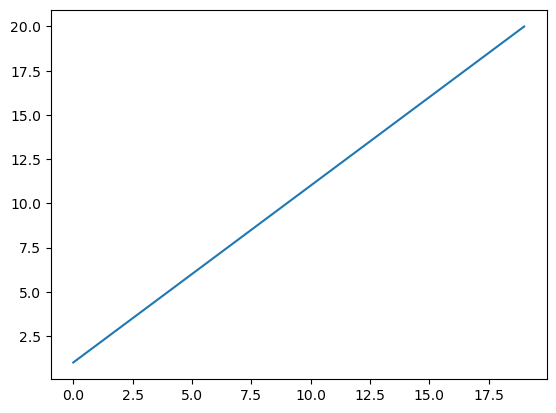

In [53]:
my_series.plot()      #Jupyter is using matplotlib library to provide visualization

<Axes: title={'center': 'title test'}>

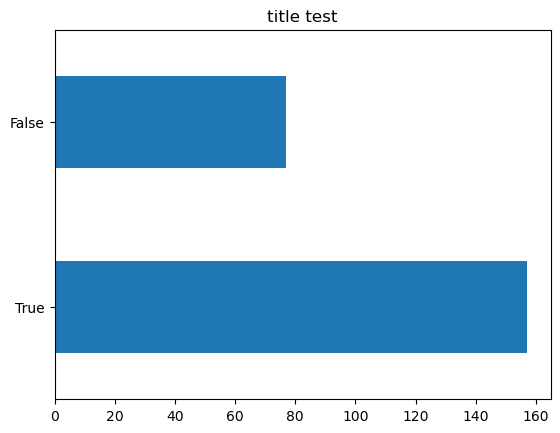

In [54]:
mpg_t.str.startswith('a').value_counts().plot.barh(title='title test')  #True is automatic car.barh is horizontal bar plot 

In [55]:
import pandas as pd

string = 'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'
letters = pd.Series(list(string))


In [56]:
# Which letter occurs the most frequently in the letters Series?
most_frequent_letter = letters.value_counts().idxmax()
print("Most frequent letter:", most_frequent_letter)

Most frequent letter: y


In [57]:
# Which letter occurs the least frequently?
least_frequent_letter = letters.value_counts().idxmin()
print("Least frequent letter:", least_frequent_letter)

Least frequent letter: l


In [58]:
# How many vowels are in the Series?
vowels = 'aeiou'
num_vowels = letters.str.lower().isin(list(vowels)).sum()
print("Number of vowels:", num_vowels)

Number of vowels: 34


In [59]:
# How many consonants are in the Series?
num_consonants = letters.str.isalpha().sum() - num_vowels
print("Number of consonants:", num_consonants)

Number of consonants: 166


In [60]:
# Create a Series that has all of the same letters but uppercased
uppercase_letters = letters.str.upper()
print("Uppercased letters Series:\n", uppercase_letters)

Uppercased letters Series:
 0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object


NameError: name 'plt' is not defined

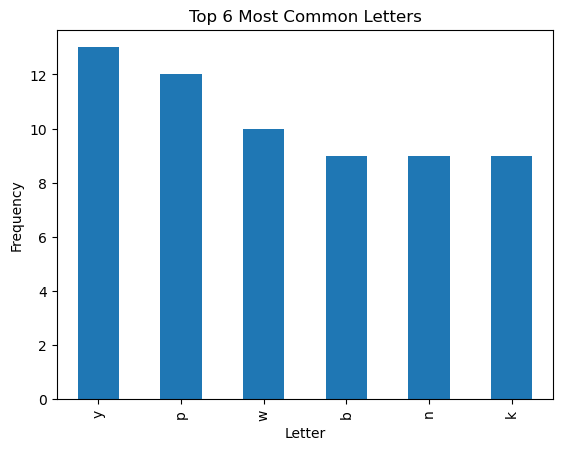

In [61]:
# Create a bar plot of the frequencies of the 6 most commonly occurring letters
top_6_letters = letters.value_counts().head(6)
top_6_letters.plot(kind='bar', 
                   xlabel='Letter', 
                   ylabel='Frequency', 
                   title='Top 6 Most Common Letters')
plt.show()

In [62]:
numbers = pd.Series(['$796,459.41', '$278.60', 
                     '$482,571.67', '$4,503,915.98', 
                     '$2,121,418.3', '$1,260,813.3', 
                     '$87,231.01', '$1,509,175.45', 
                     '$4,138,548.00', '$2,848,913.80', 
                     '$594,715.39', '$4,789,988.17', 
                     '$4,513,644.5', '$3,191,059.97', 
                     '$1,758,712.24', '$4,338,283.54', 
                     '$4,738,303.38', '$2,791,759.67', 
                     '$769,681.94', '$452,650.23'])


In [63]:
# What is the data type of the numbers Series?
numbers_dtype = numbers.dtype
print("Data type of numbers Series:", numbers_dtype)

Data type of numbers Series: object


In [64]:
# How many elements are in the numbers Series?
num_elements = len(numbers)
print("Number of elements in numbers Series:", num_elements)

Number of elements in numbers Series: 20


In [65]:
# Perform the necessary manipulations to convert the numbers Series to a numeric data type
numbers = numbers.str.replace(',', '').str.replace('$', '').astype(float)

/var/folders/mn/mp1xhgm522gc5vhffb_k61d00000gn/T/ipykernel_62237/3394169108.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numbers = numbers.str.replace(',', '').str.replace('$', '').astype(float)


In [66]:
# Discover the maximum value from the Series
max_value = numbers.max()
print("Maximum value in the Series:", max_value)

Maximum value in the Series: 4789988.17


In [67]:
# Discover the minimum value from the Series
min_value = numbers.min()
print("Minimum value in the Series:", min_value)

Minimum value in the Series: 278.6


In [68]:
# Find the range of the values in the Series
range_values = max_value - min_value
print("Range of the values in the Series:", range_values)

Range of the values in the Series: 4789709.57


In [69]:
# Bin the data into 4 equally sized intervals or bins and output how many values fall into each bin
bin_counts = pd.cut(numbers, bins=4).value_counts()
print("Binned data:\n", bin_counts)

Binned data:
 (-4511.11, 1197705.993]       7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64


NameError: name 'plt' is not defined

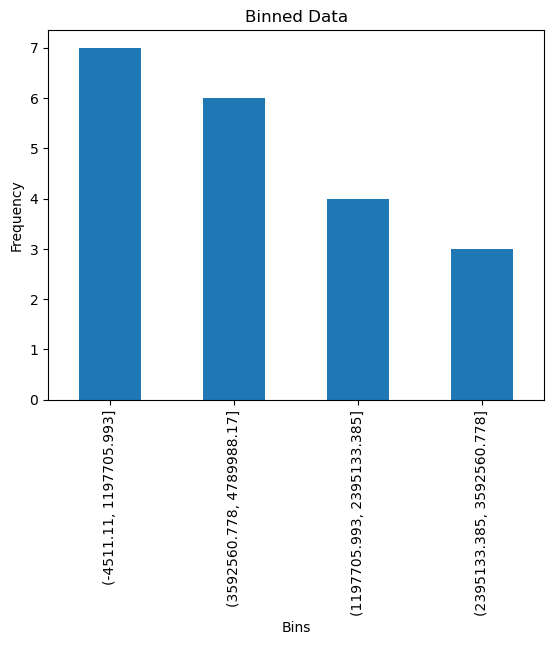

In [70]:
# Plot the binned data
bin_counts.plot(kind='bar', 
                xlabel='Bins', 
                ylabel='Frequency', 
                title='Binned Data')
plt.show()

In [71]:
exam_scores = pd.Series([60, 86, 75, 62, 93, 71, 
                         60, 83, 95, 78, 65, 72, 
                         69, 81, 96, 80, 85, 92, 82, 78])


In [72]:
# How many elements are in the exam_scores Series?
num_elements = len(exam_scores)
print("Number of elements in exam_scores Series:", num_elements)


Number of elements in exam_scores Series: 20


In [79]:
# Discover the minimum, maximum, mean, 
# and median scores for the exam_scores Series
min_score = exam_scores.min()
max_score = exam_scores.max()
mean_score = exam_scores.mean()
median_score = exam_scores.median()
print(min_score)
print(max_score)
print(mean_score)
print(median_score)

60
96
78.15
79.0


NameError: name 'plt' is not defined

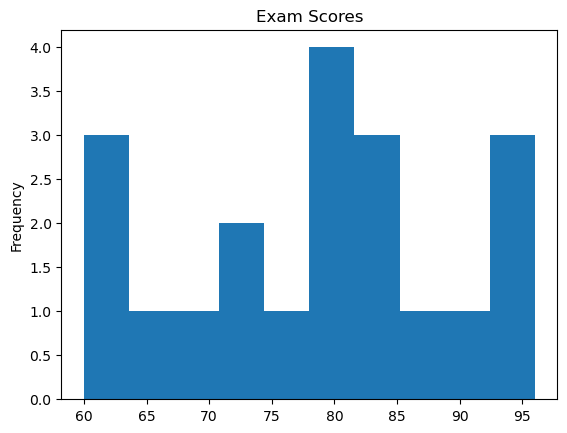

In [74]:
# Plot the Series
exam_scores.plot(kind='hist', bins=10, xlabel='Score', 
                 ylabel='Frequency', title='Exam Scores')
plt.show()

In [75]:
# Curve the exam_scores Series and save it as curved_grades
curve_amount = 100 - max_score
curved_grades = exam_scores + curve_amount


In [76]:
# Convert the numeric values in the curved_grades Series to categorical letter grades
letter_grades = pd.cut(curved_grades, bins=[0, 59, 69, 79, 89, 100], 
                       labels=['F', 'D', 'C', 'B', 'A'])


NameError: name 'plt' is not defined

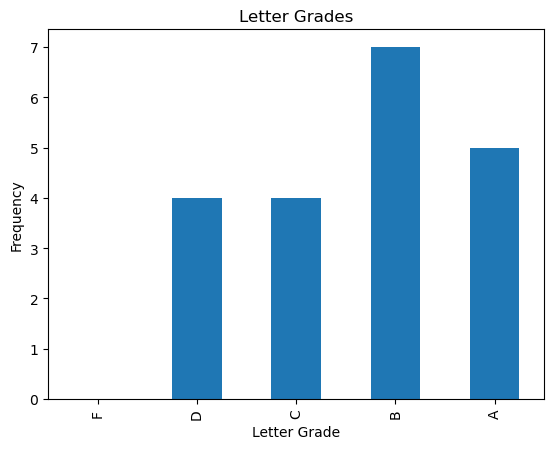

In [77]:
# Plot the categorical letter_grades Series
letter_grades.value_counts().sort_index().plot(kind='bar', 
                                               xlabel='Letter Grade', 
                                               ylabel='Frequency', 
                                               title='Letter Grades')
plt.show()